In [1]:
# The Olivetti faces dataset
# 올리베티 얼굴 데이터셋
# 1992~1994 AT&T와 캠브리지 대학 전산 연구실에서 공동으로 제작한 얼굴 사진 데이터베이스
# 40명의 흑백 얼굴 사진 400장, 4096 (64x64) 특성
# 0.0~1.0 (0~255 를 스케일링)

In [2]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces() # 40명 400장의 흑백이미지
print(len(faces.data))
print(set(faces.target))

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\tjoeun\scikit_learn_data
400
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39}


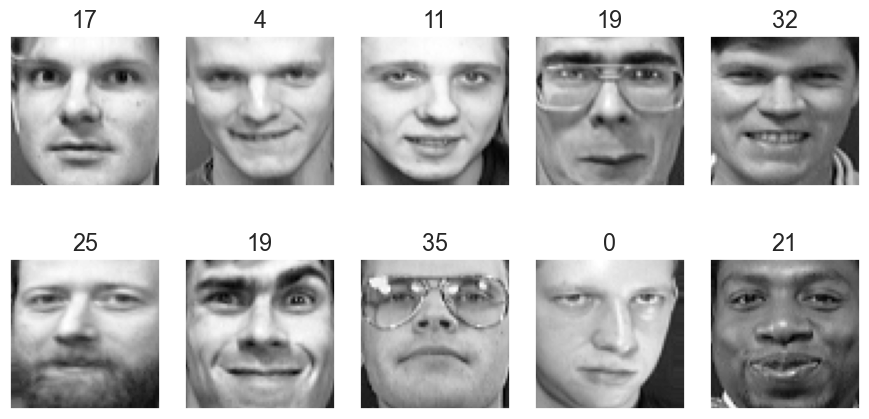

In [13]:
import matplotlib.pyplot as plt
import numpy as np
N = 2 # 2행
M = 5 # 5열
np.random.seed(0)
fig = plt.figure(figsize=(9, 5))
# 컬러맵: https://matplotlib.org/tutorials/colors/colormaps.html
klist = np.random.choice(range(len(faces.data)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i * M +j + 1)
        ax.imshow(faces.images[k], cmap=plt.cm.gray) 
        # imshow 함수 >> 그래프상에 이미지를 출력
        ax.xaxis.set_ticks([]) # x축 눈금 제거
        ax.yaxis.set_ticks([]) # y축 눈금 제거
        plt.title(faces.target[k])
plt.tight_layout() # 여백 조절
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, 
                                                    stratify=faces.target, 
                                                    test_size=0.2, 
                                                    random_state=0)

In [6]:
from sklearn.svm import SVC
svc = SVC().fit(X_train, y_train)

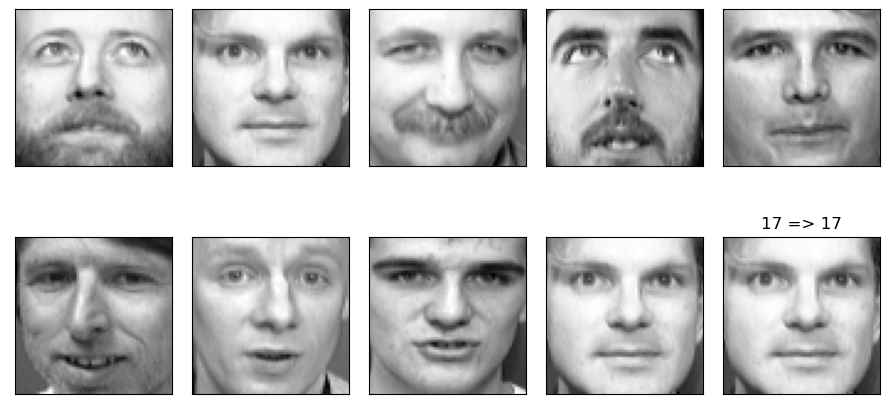

In [7]:
N = 2
M = 5
np.random.seed(4)
fig = plt.figure(figsize=(9, 5))
klist = np.random.choice(range(len(y_test)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i * M + j + 1)
        ax.imshow(X_test[k:(k + 1), :].reshape(64, 64), cmap=plt.cm.gray)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        pred=svc.predict(X_test[k:(k + 1), :])[0]
plt.title(f"{y_test[k]} => {pred}")
plt.tight_layout()
plt.show()

In [8]:
print("학습용:",svc.score(X_train, y_train))
print("검증용:",svc.score(X_test, y_test))

학습용: 1.0
검증용: 0.95


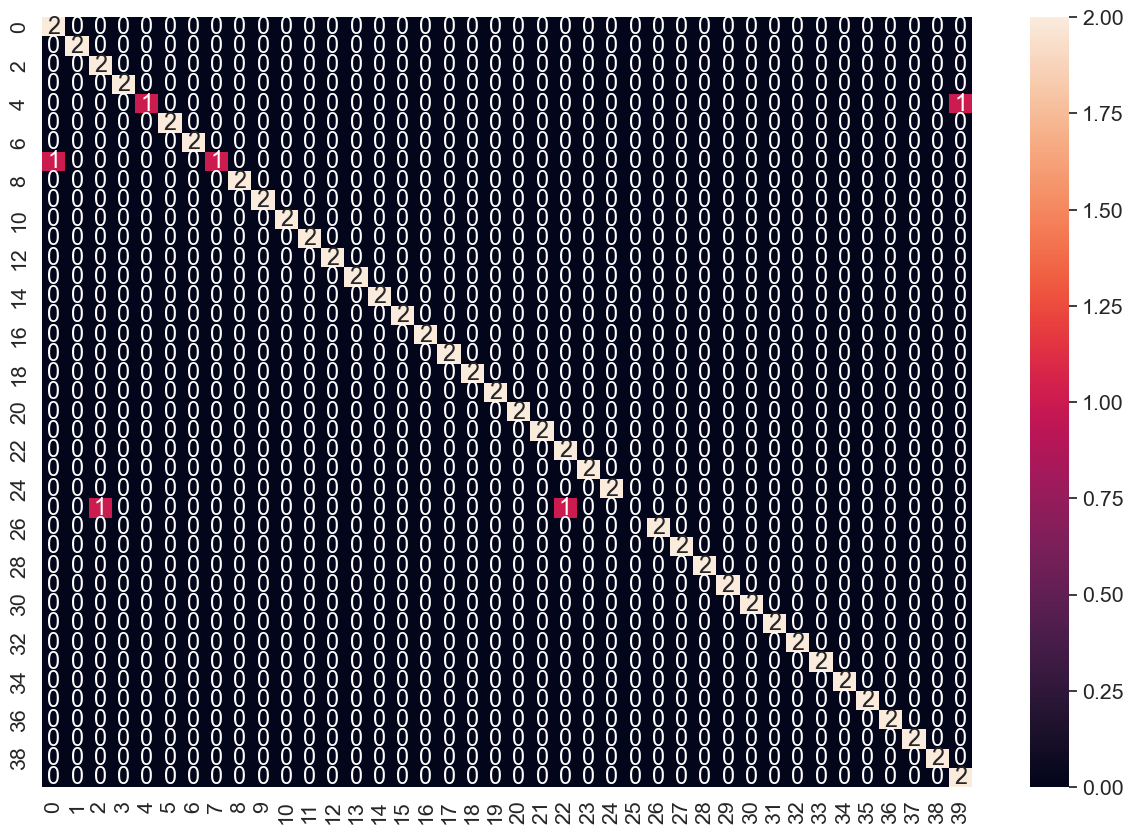

In [9]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd
pred = svc.predict(X_test)
cm=confusion_matrix(y_test, pred) # 정오분류표

# 데이터프레임으로 변환
df_cm=pd.DataFrame(cm, index=range(0,40),columns=range(0,40))
sns.set(font_scale=1.4)
plt.figure(figsize=(15,10))
sns.heatmap(df_cm, annot=True) #히트맵 출력
plt.show()

In [10]:
print(classification_report(y_test, pred))
# class 4,7은 정확도가 낮음(f1-score 기준)

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         2
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         2
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      0.50      0.67         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00    

c:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
import sys
print(sys.getsizeof(X_train))
print(sys.getsizeof(X_train)/(1024*1024))

5243000
5.000114440917969


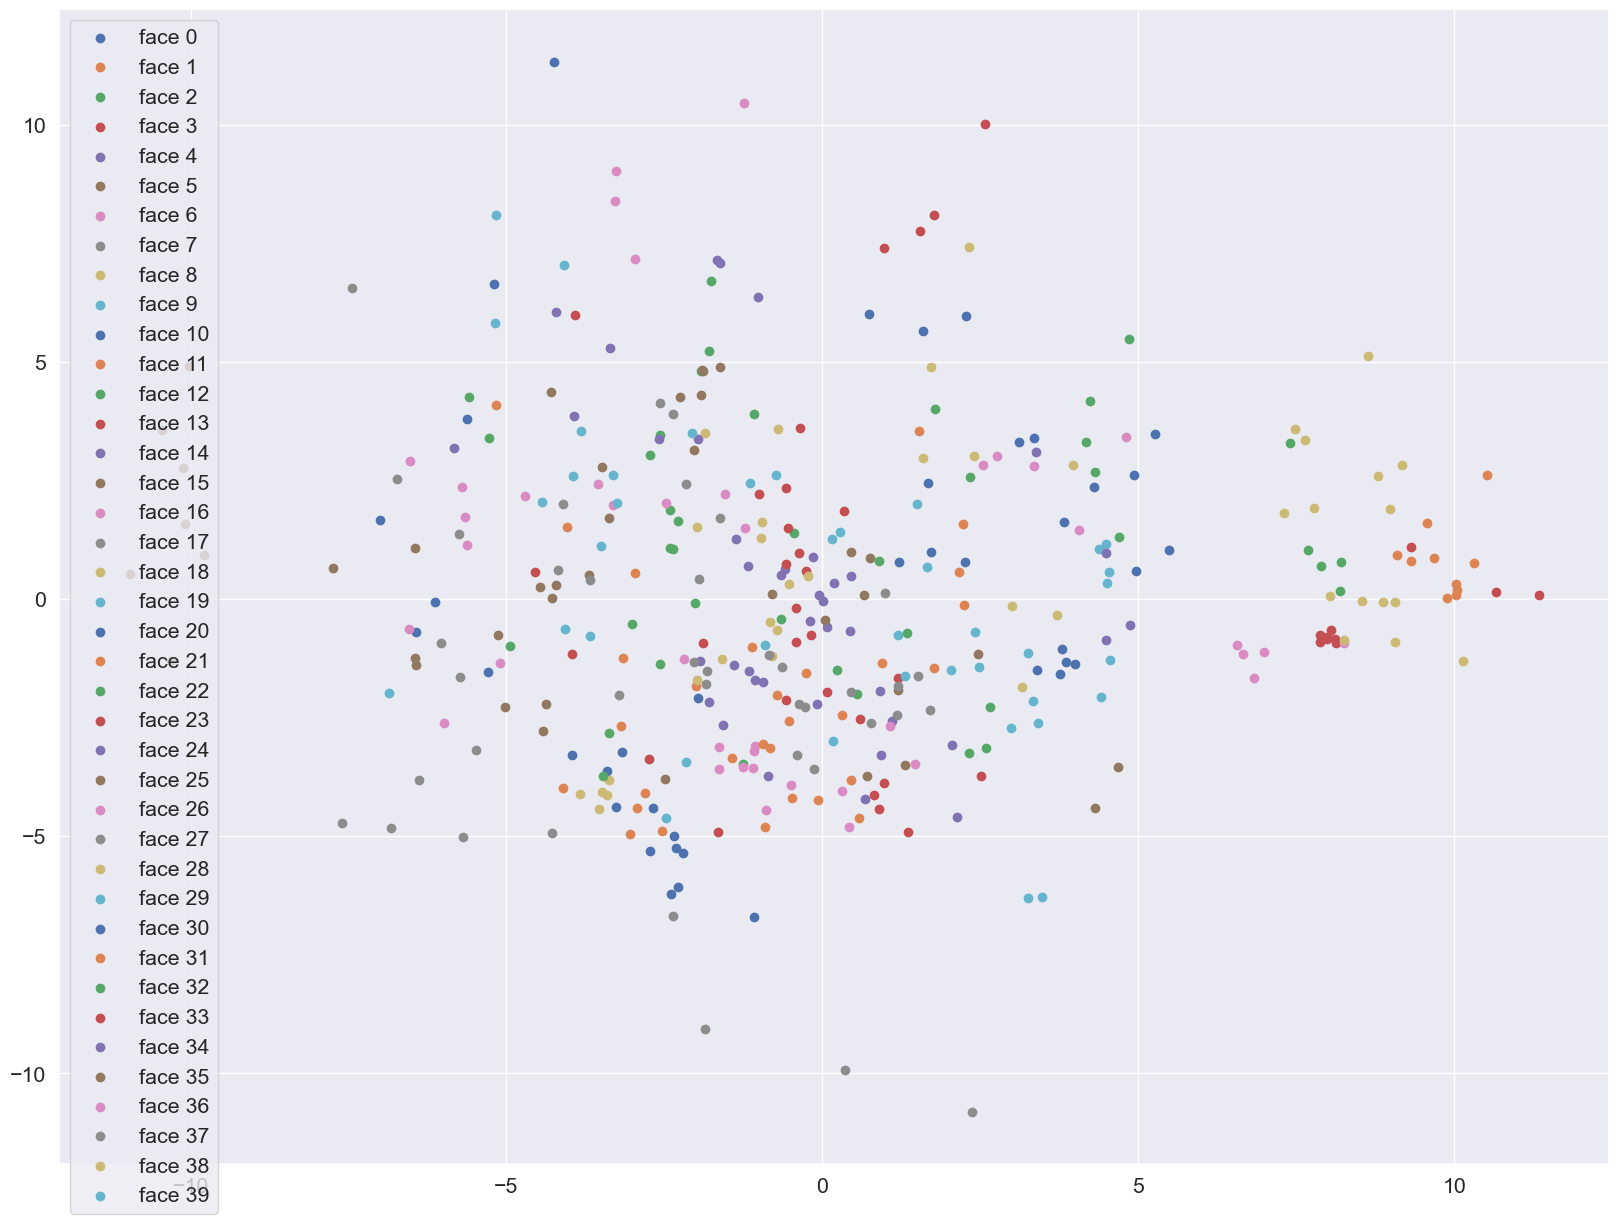

In [16]:
# 주성분 분석
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt 

pca=PCA(n_components=2, random_state=10) # 변수 4096개 => 변수 2개(2차원)
components=pca.fit_transform(faces.data)
df=pd.DataFrame(data=components, columns=['component 1','component 2'])
df.index=faces.target
plt.figure(figsize=(20,15))
for i in range(40):
    plt.scatter(df.iloc[faces.target == i, 0], df.iloc[faces.target == i, 1],  label=f'face {i}')
    plt.legend()
plt.show()